# Compare NUOPC versus MCT (G-compset)

This comparison is done to evaluate if the area corrections introduced by the PR below are being done properly. We will be comparing hourly snapshots of the surface fluxes passed to MOM6.
https://github.com/NCAR/MOM6/pull/176

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mom6_tools.m6plot import xycompare
from mom6_tools.MOM6grid import MOM6grid

Basemap module not found. Some regional plots may not function properly


In [2]:
pth = '/glade/scratch/gmarques/'
grd = MOM6grid(pth+'gmom.e22.GJRAv3.TL319_t061_zstar_N65.mct.dev_ncar.001/run/ocean.mom6.static.nc')

MOM6 grid successfully loaded... 



## MCT case

In [3]:
g1_mct = xr.open_dataset(pth+"gmom.e22.GJRAv3.TL319_t061_zstar_N65.mct.dev_ncar.001/run/ocean.mom6.snap_0001.nc")

# NUOPC cases

In [5]:
g1_npc = xr.open_dataset(pth+"gmom.e22.GJRAv3.TL319_t061_zstar_N65.nuopc.dev_ncar.001/run/ocean.mom6.snap_0001.nc")
g1_npc_flx_corr = xr.open_dataset(pth+"gmom.e22.GJRAv3.TL319_t061_zstar_N65.nuopc.PR176/run/ocean.mom6.snap_0001.nc")

In [6]:
#g1_npc
#g1_npc_flx_corr

### Variables to be compared

In [7]:
variables = ['taux', 'tauy', 'latent', 'sensible', 'SW', 'LW', 'salt_flux_in', 'seaice_melt', 'evap', 
            'lrunoff', 'frunoff', 'lprec', 'fprec']

### 1) Compare MCT vs NUOPC BEFORE the flux correction was implemented in NUOPC

MCT time (days) =  0001-01-01 01:59:59.999999
NUOPC time (days) =  0001-01-01 01:59:59.999999
taux
tauy
latent
sensible
SW
LW
salt_flux_in
seaice_melt
evap
lrunoff
frunoff
lprec
fprec


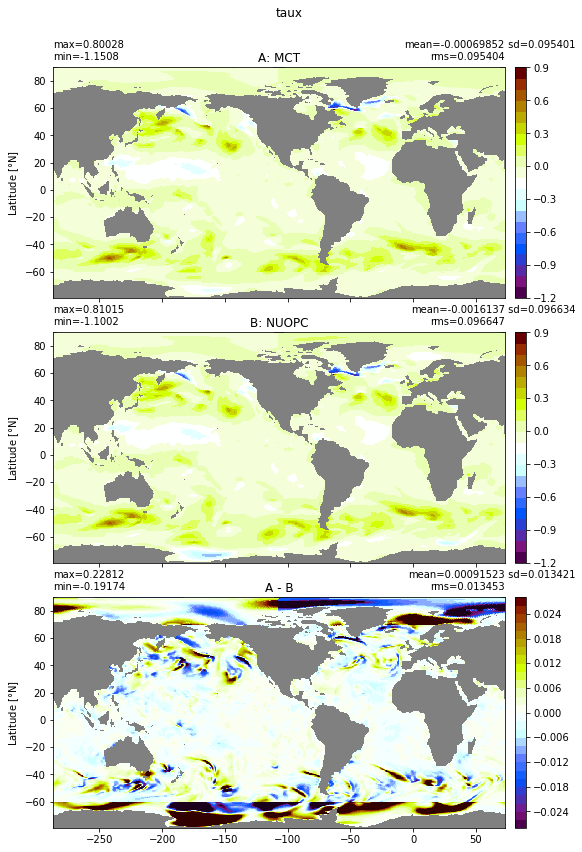

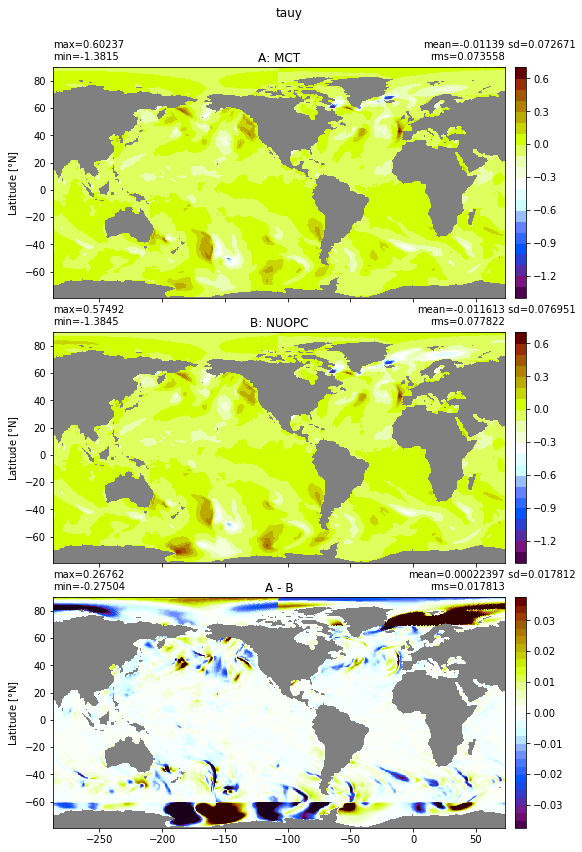

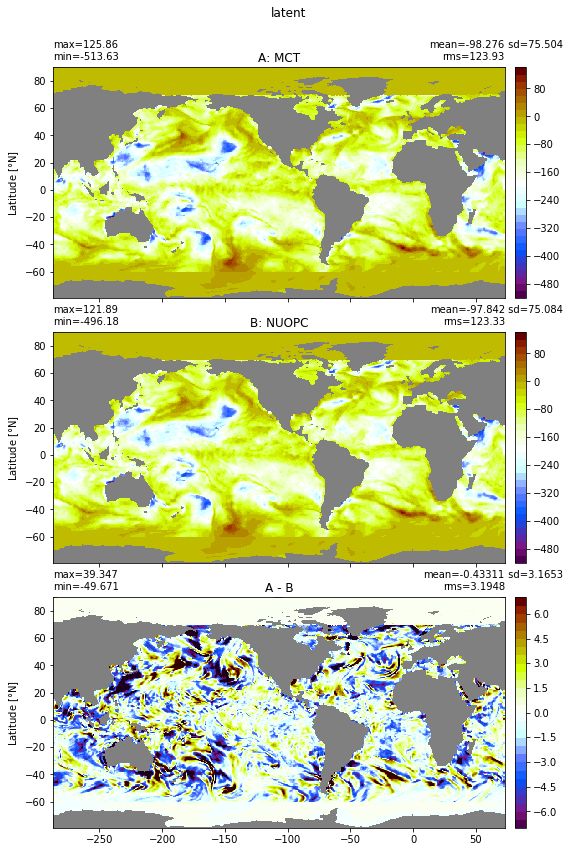

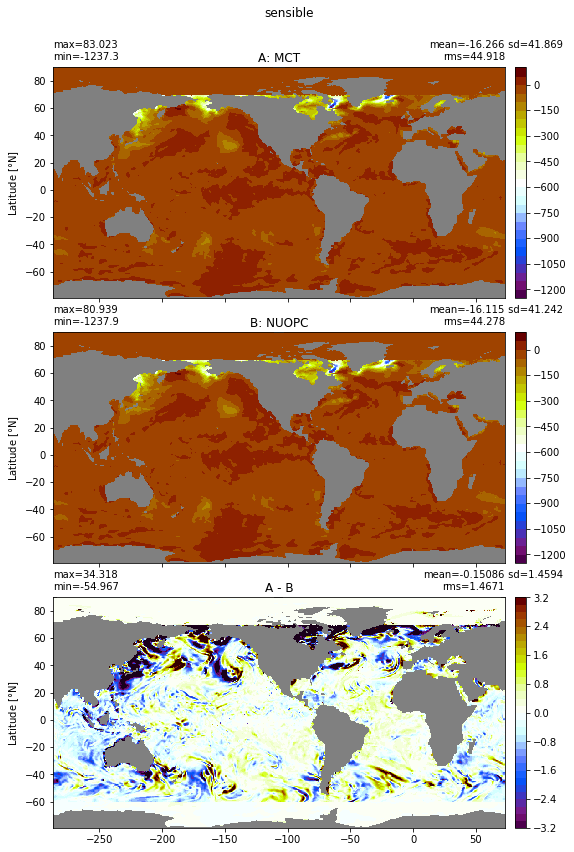

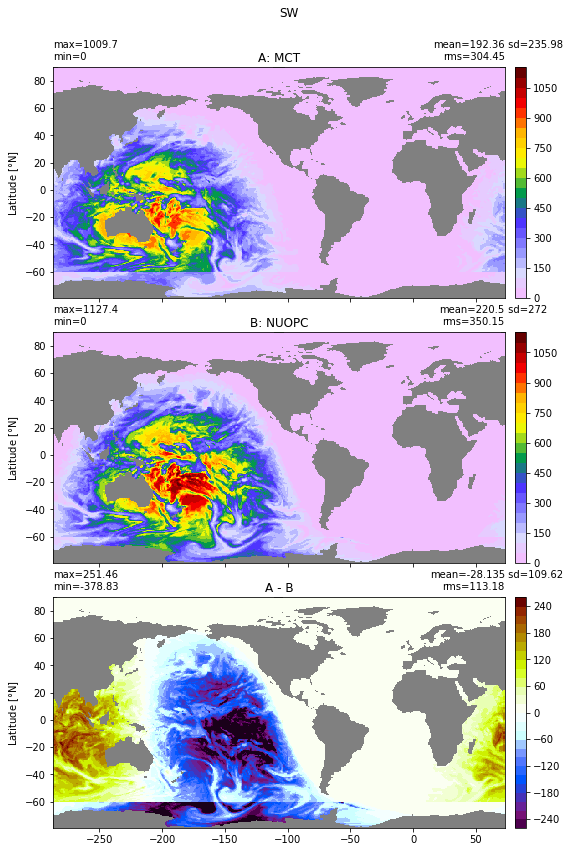

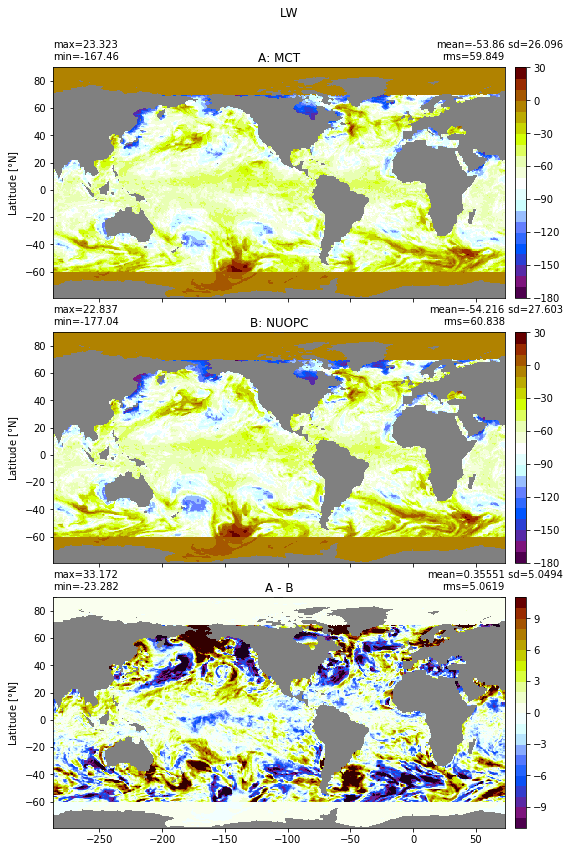

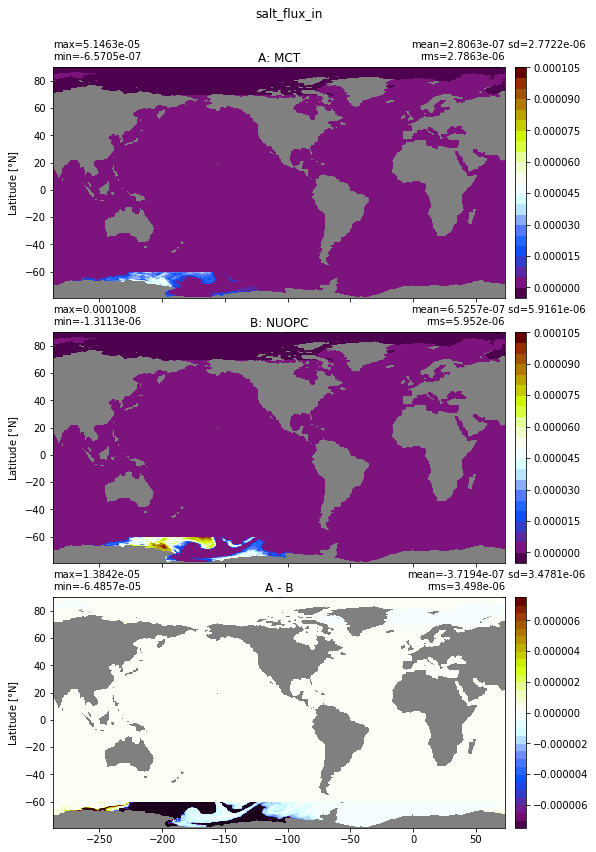

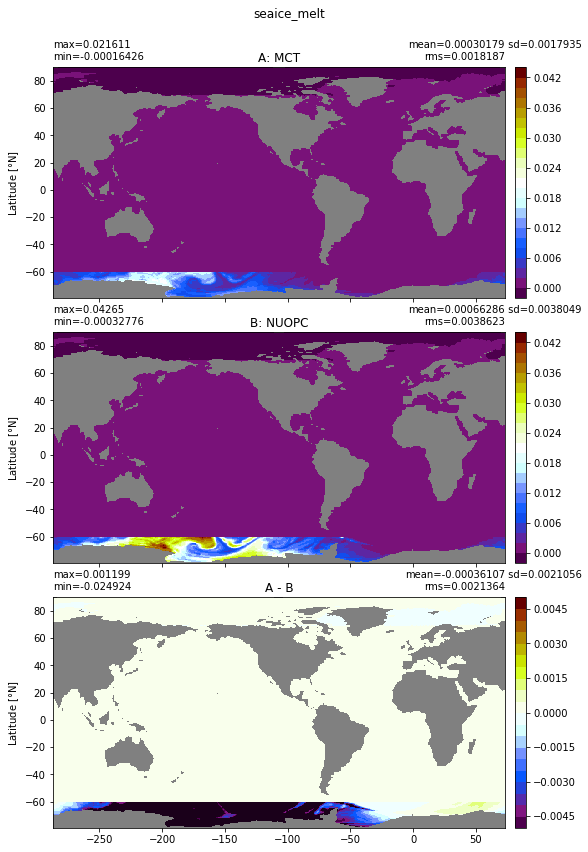

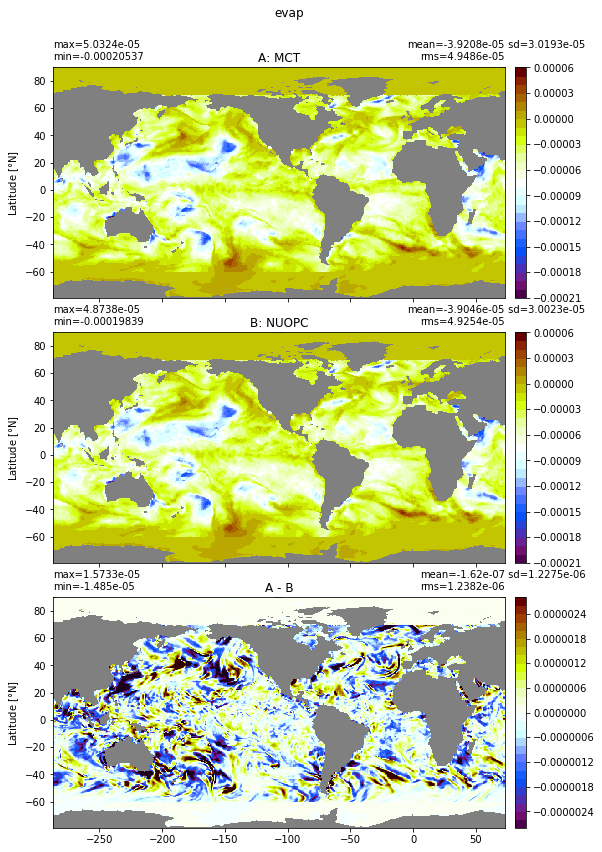

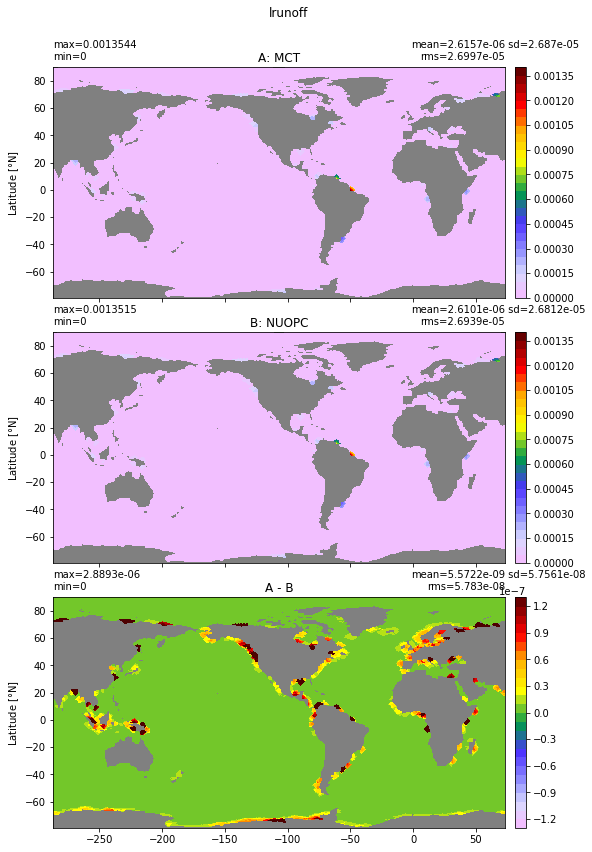

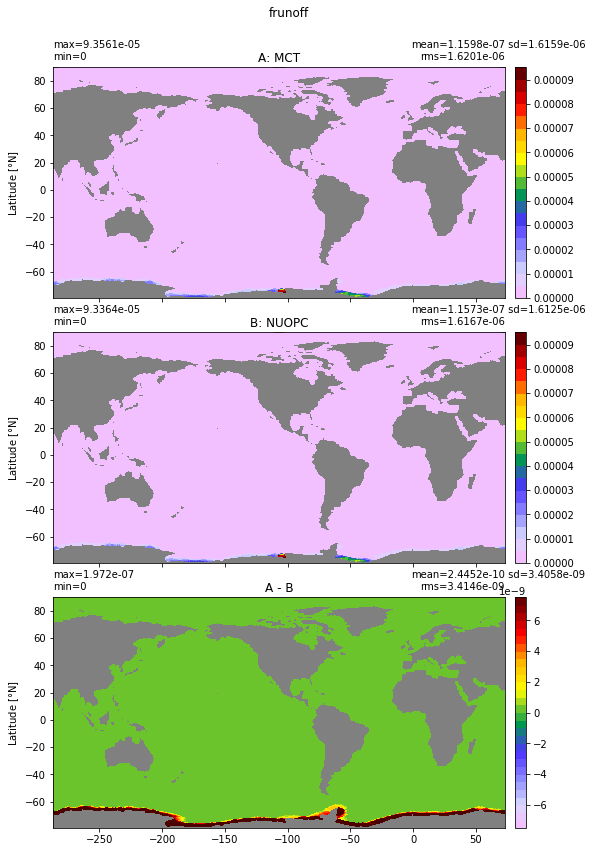

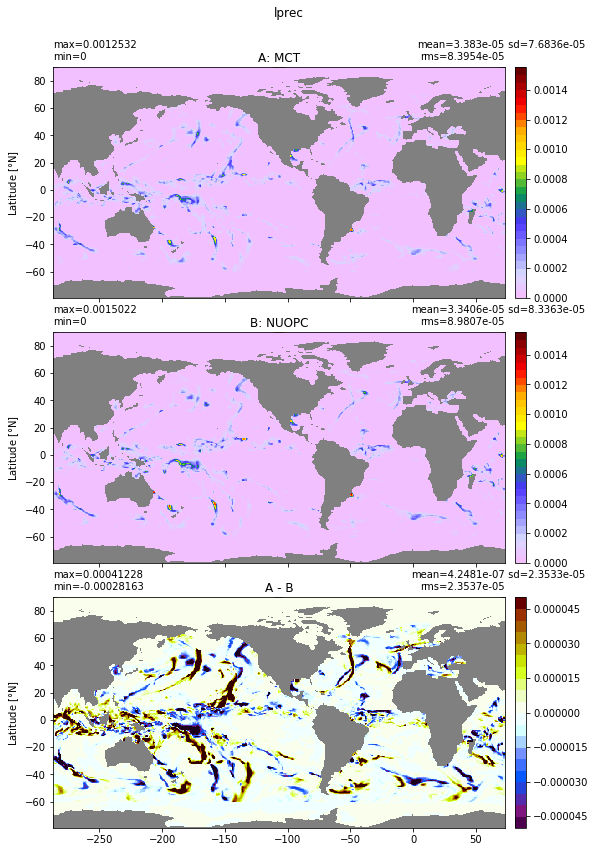

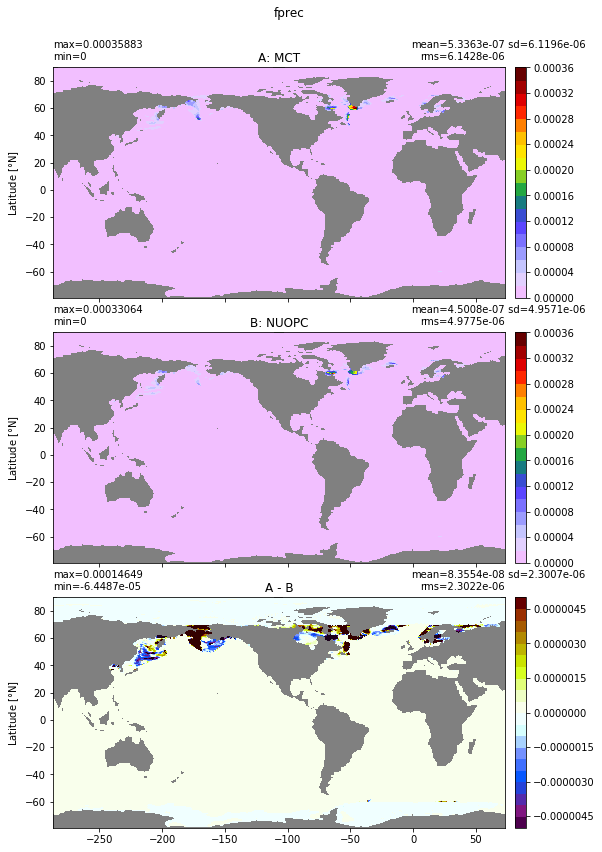

In [11]:
%matplotlib inline

t = 1 # time indice
print('MCT time (days) = ',g1_mct['time'][t].data)
print('NUOPC time (days) = ',g1_npc['time'][t].data)

for p in range(len(variables)):
    print(variables[p])
    nuopc_var = np.ma.masked_invalid(g1_npc[variables[p]][t,:].values)
    mct_var = np.ma.masked_invalid(g1_mct[variables[p]][t,:].values)
    xycompare(mct_var, nuopc_var, x=grd.geolon, y=grd.geolat, area=grd.area_t, title1='MCT', title2='NUOPC', suptitle=variables[p])

### 2) Compare MCT vs NUOPC AFTER the flux correction was implemented in NUOPC

MCT time (days) =  0001-01-01 01:59:59.999999
NUOPC time (days) =  0001-01-01 01:59:59.999999
taux
tauy
latent
sensible
SW
LW
salt_flux_in
seaice_melt
evap
lrunoff
frunoff
lprec
fprec


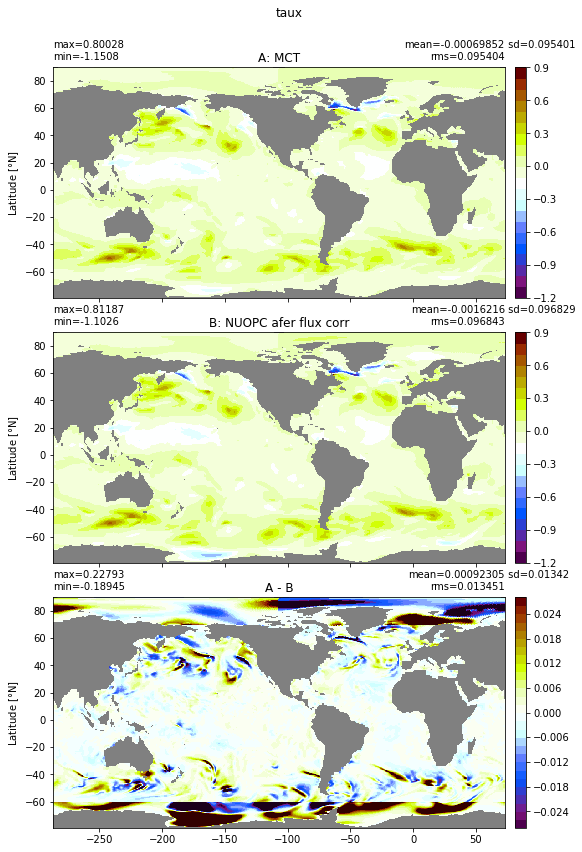

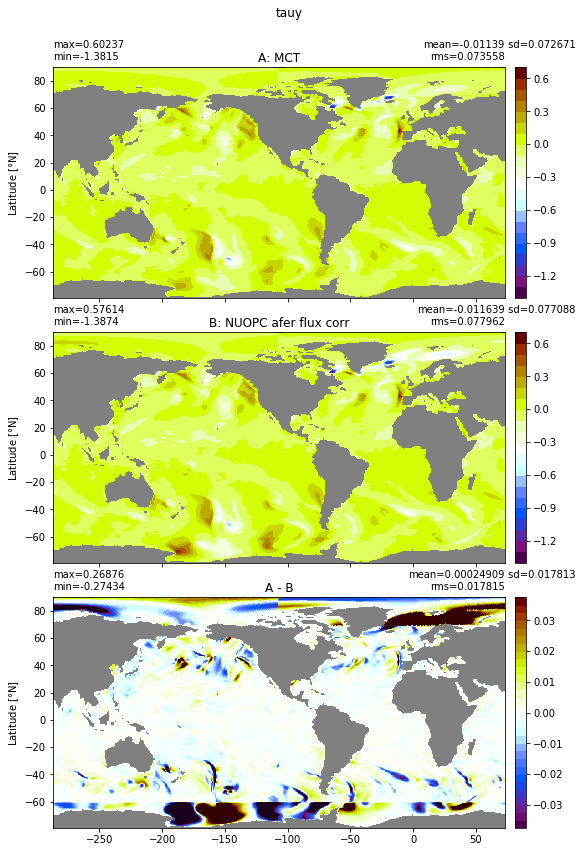

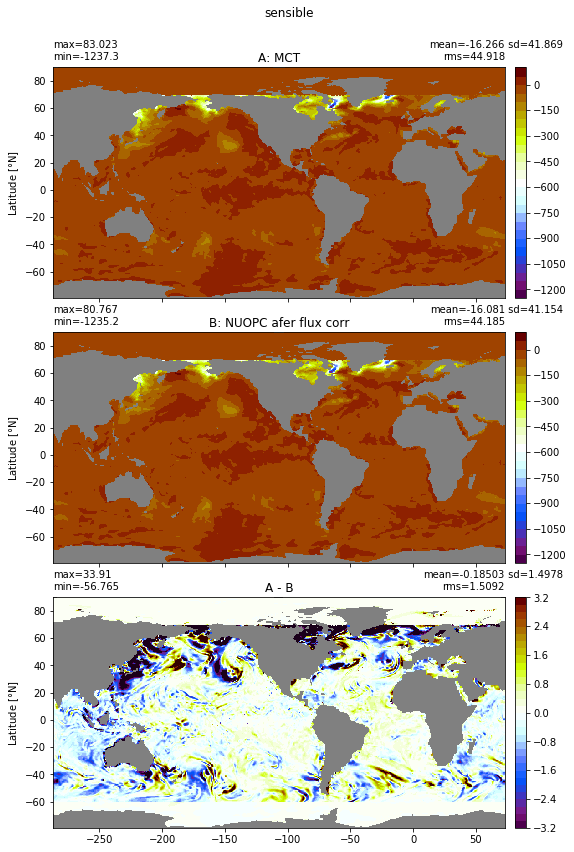

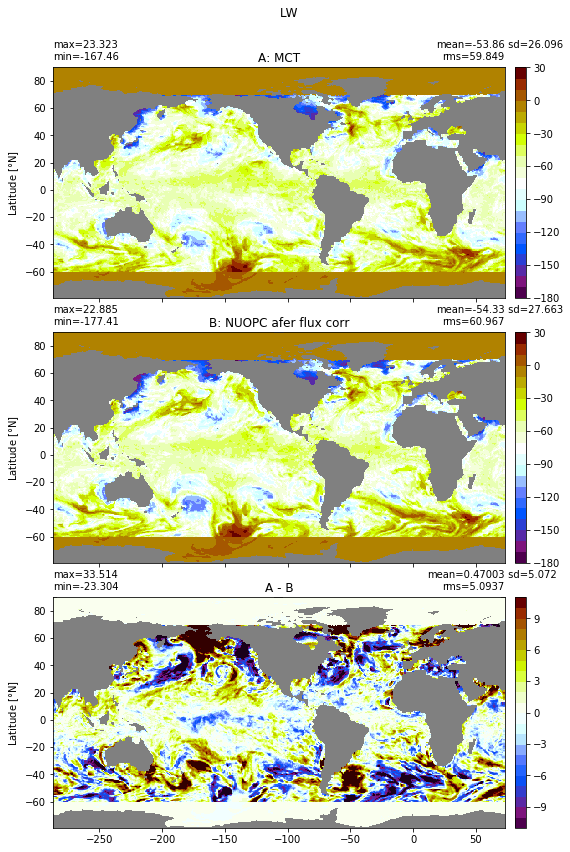

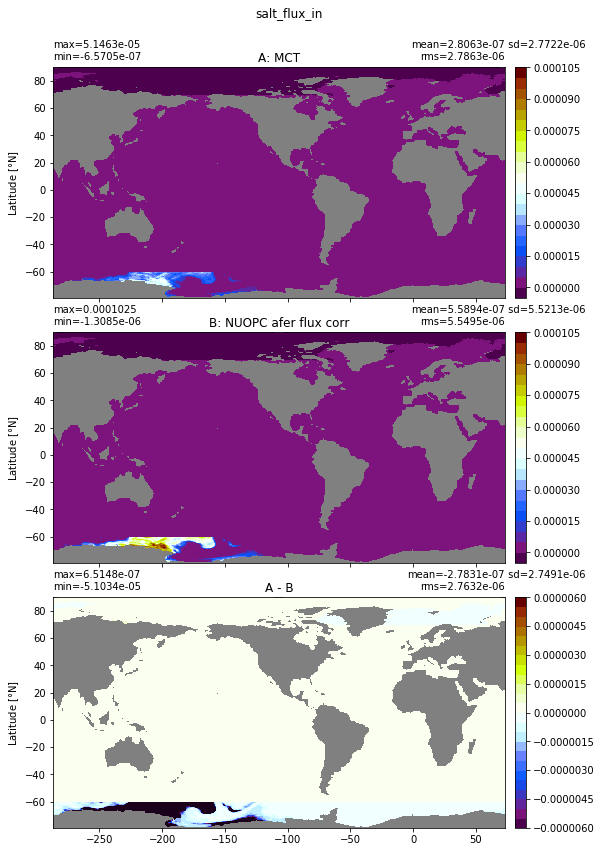

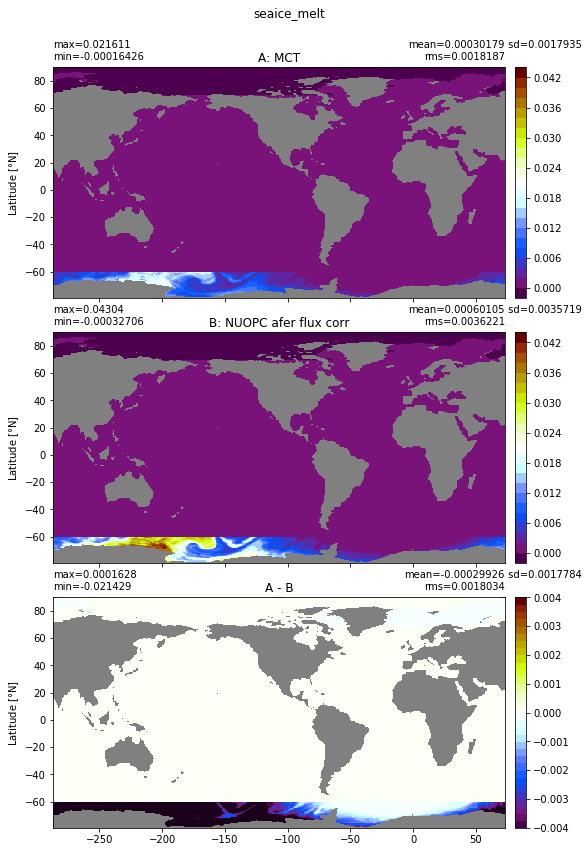

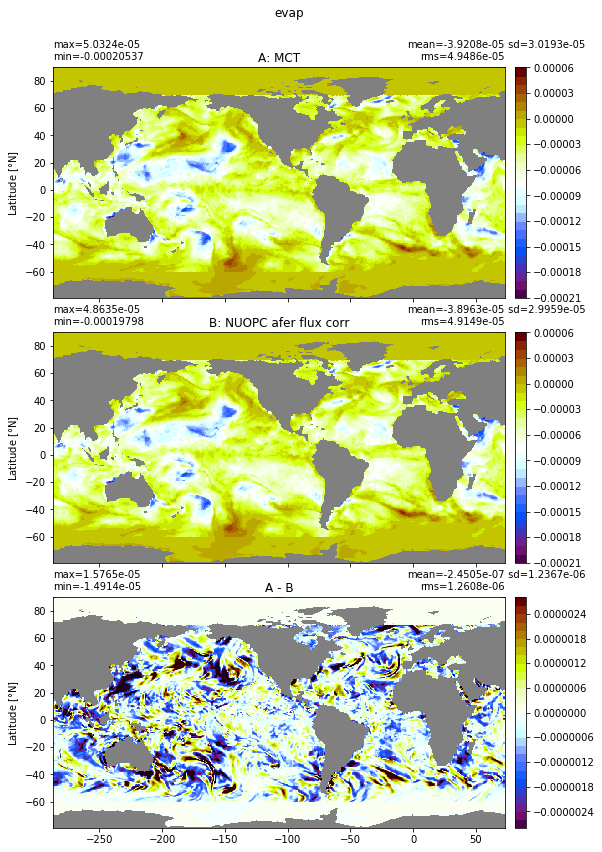

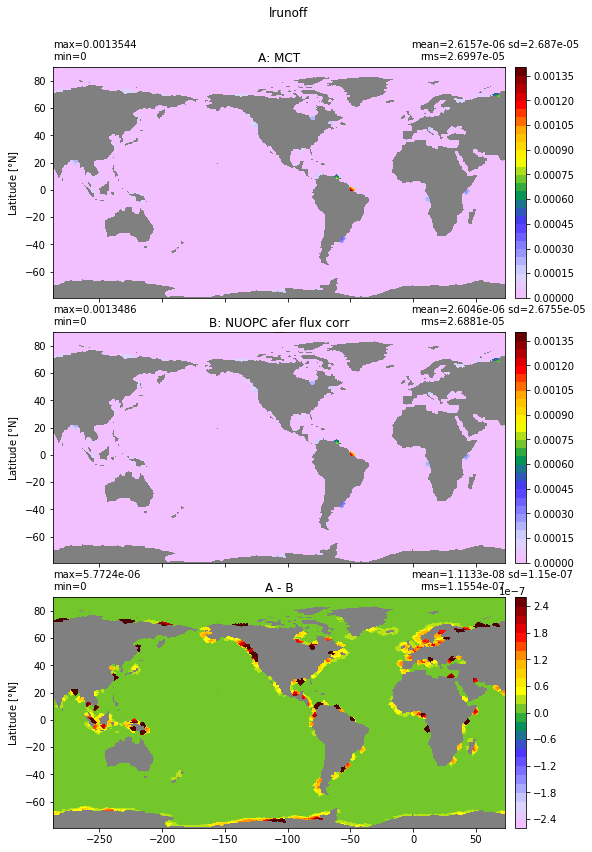

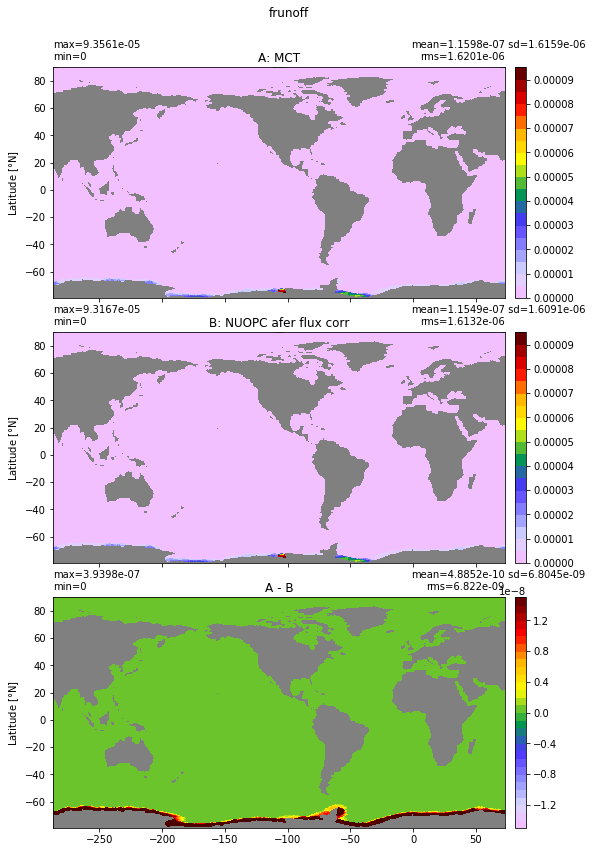

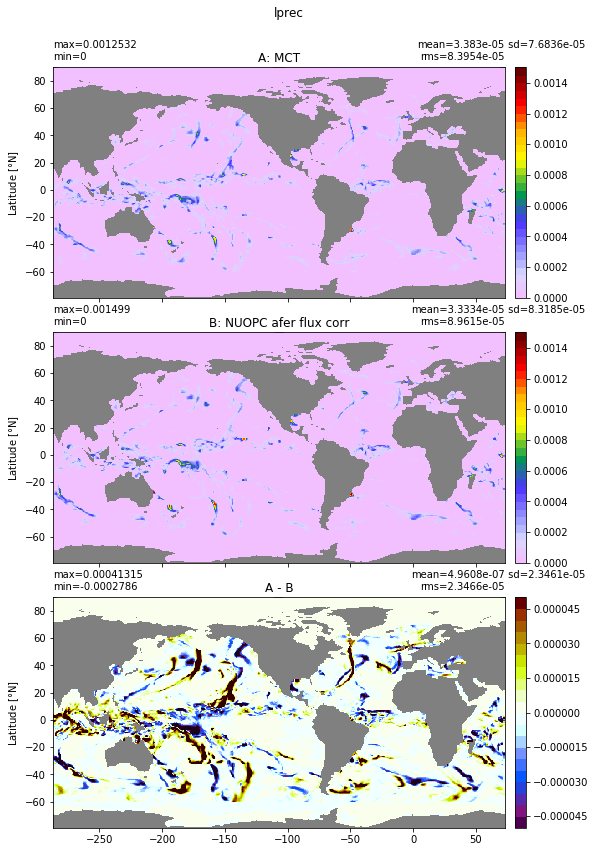

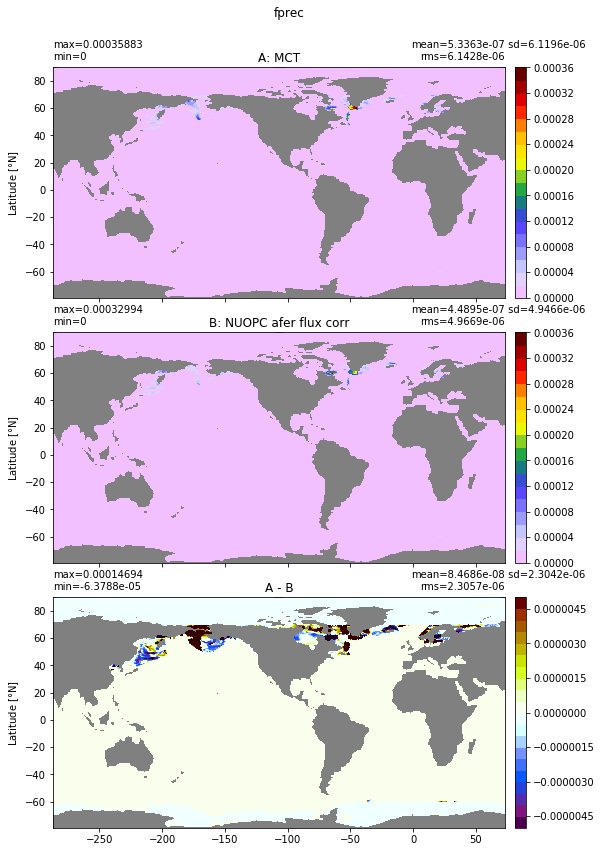

In [12]:
%matplotlib inline

t = 1 # time indice
print('MCT time (days) = ',g1_mct['time'][t].data)
print('NUOPC time (days) = ',g1_npc_flx_corr['time'][t].data)

for p in range(len(variables)):
    print(variables[p])
    nuopc_var = np.ma.masked_invalid(g1_npc_flx_corr[variables[p]][t,:].values)
    mct_var = np.ma.masked_invalid(g1_mct[variables[p]][t,:].values)
    xycompare(mct_var, nuopc_var, x=grd.geolon, y=grd.geolat, area=grd.area_t, title1='MCT', title2='NUOPC afer flux corr', suptitle=variables[p])

### 3) Compare NUOPC before vs after the flux correction was implemented

NUOPC1 time (days) =  0001-01-01 03:00:00
NUOPC2 time (days) =  0001-01-01 03:00:00
taux
tauy
latent
sensible
SW
LW
salt_flux_in
seaice_melt
evap
lrunoff
frunoff
lprec
fprec


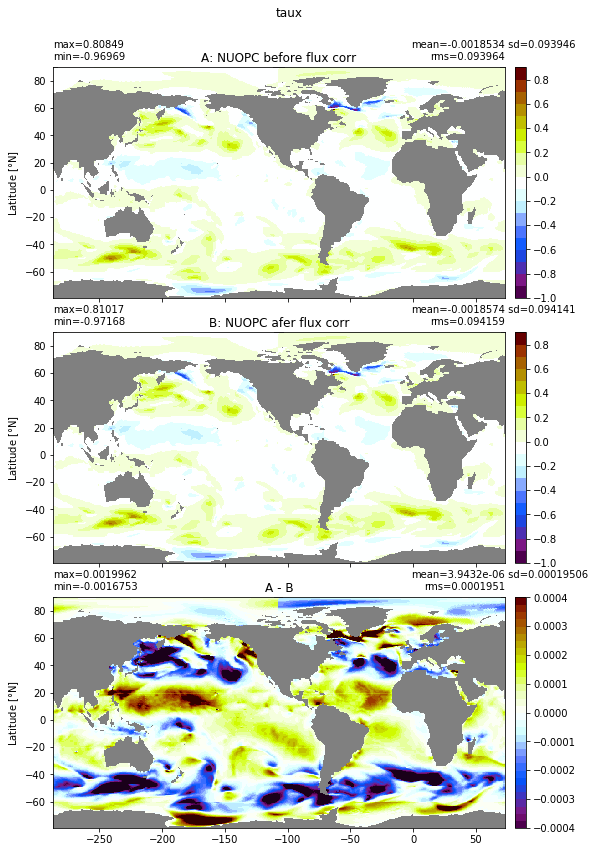

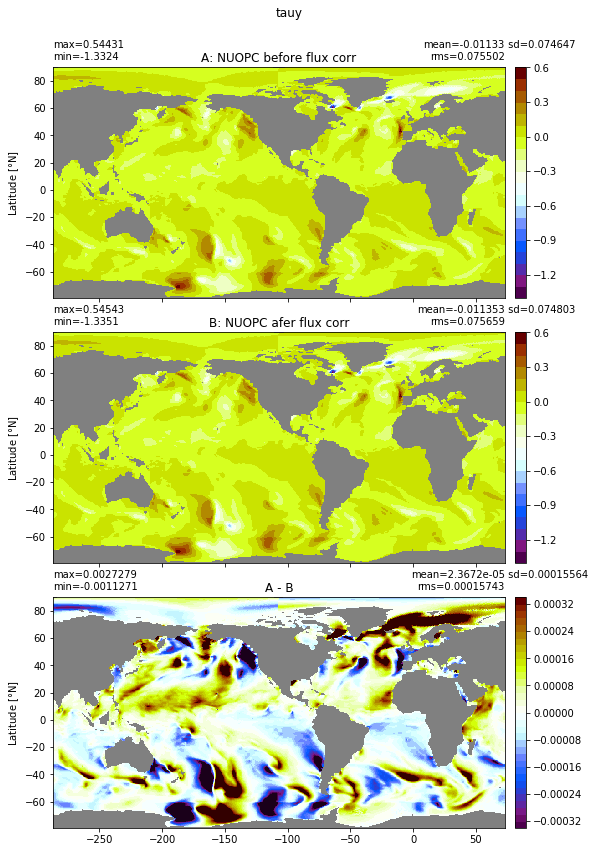

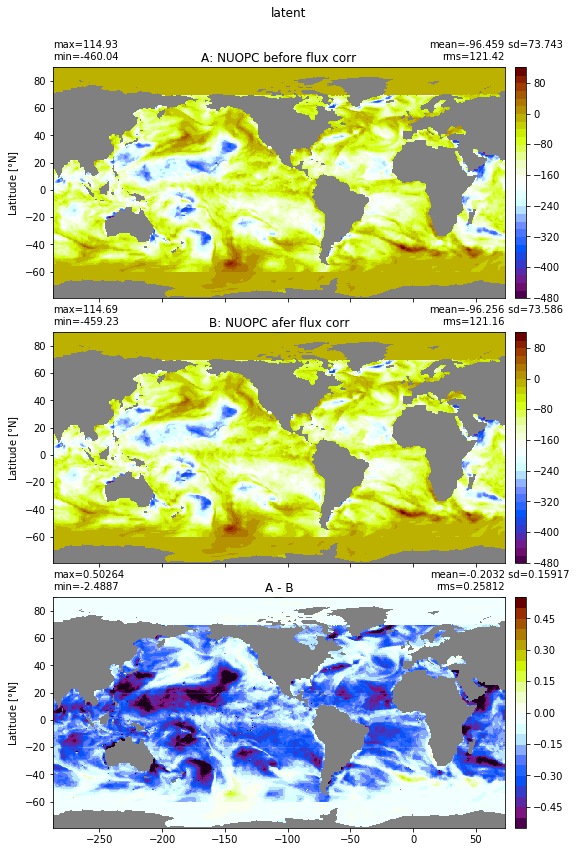

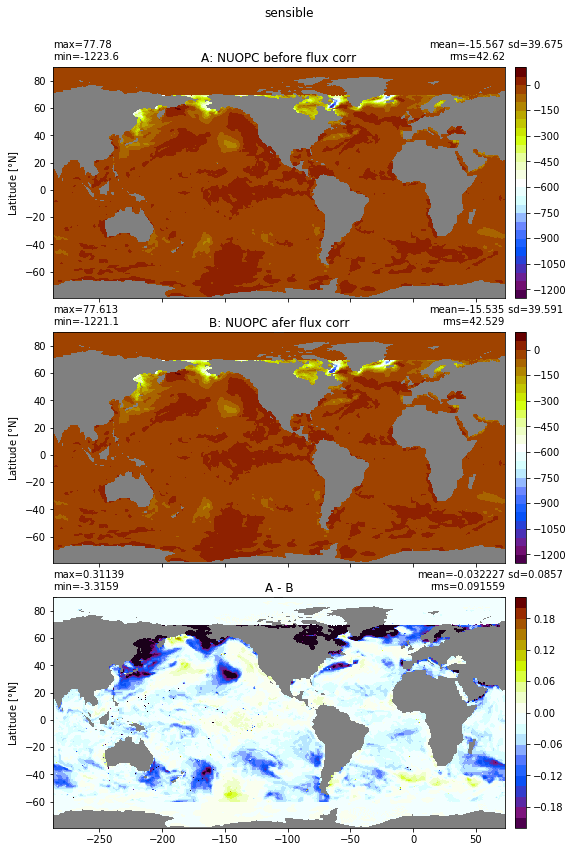

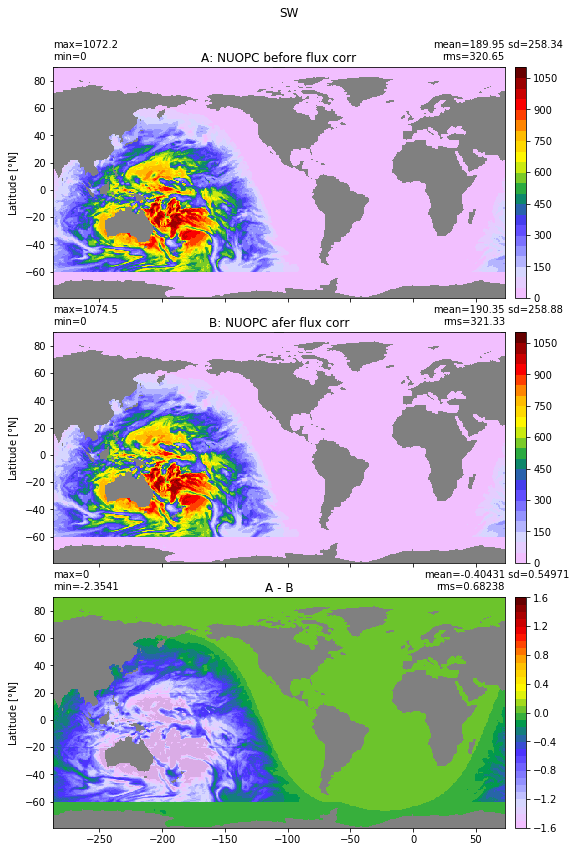

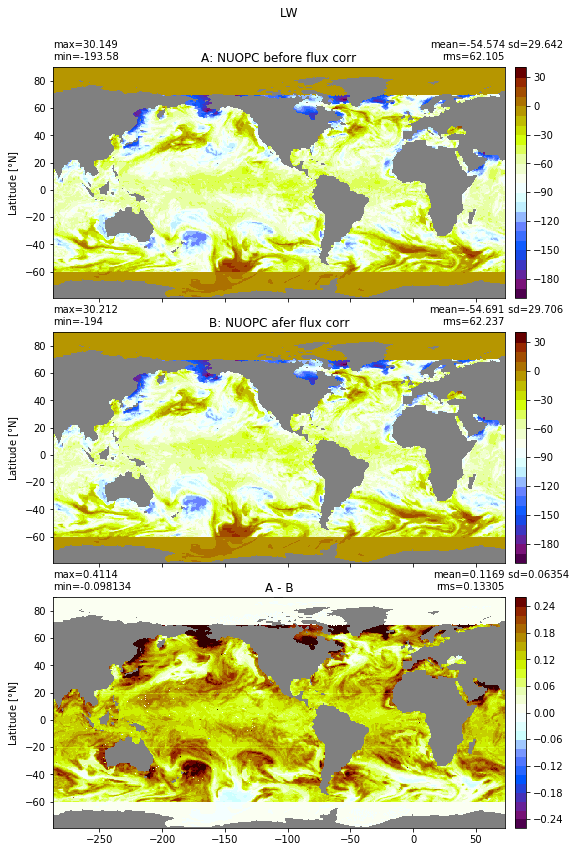

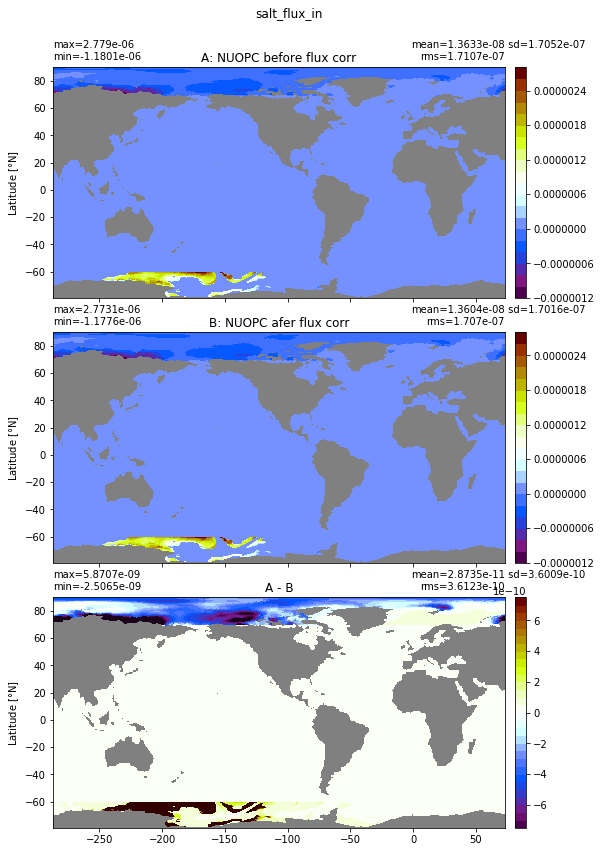

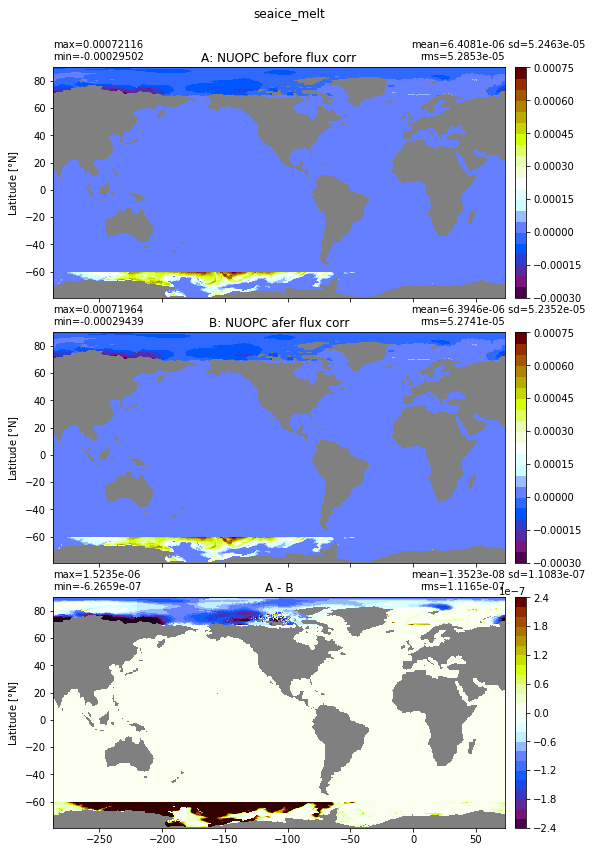

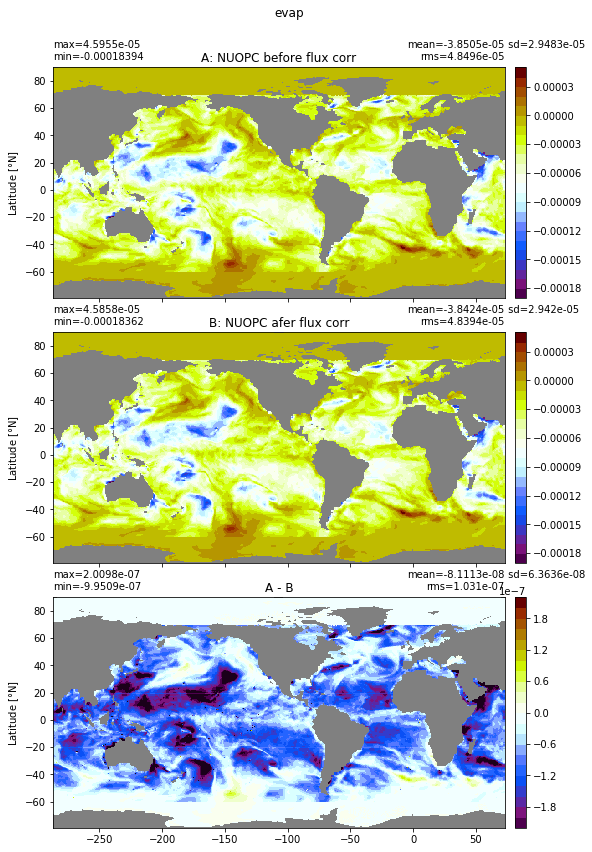

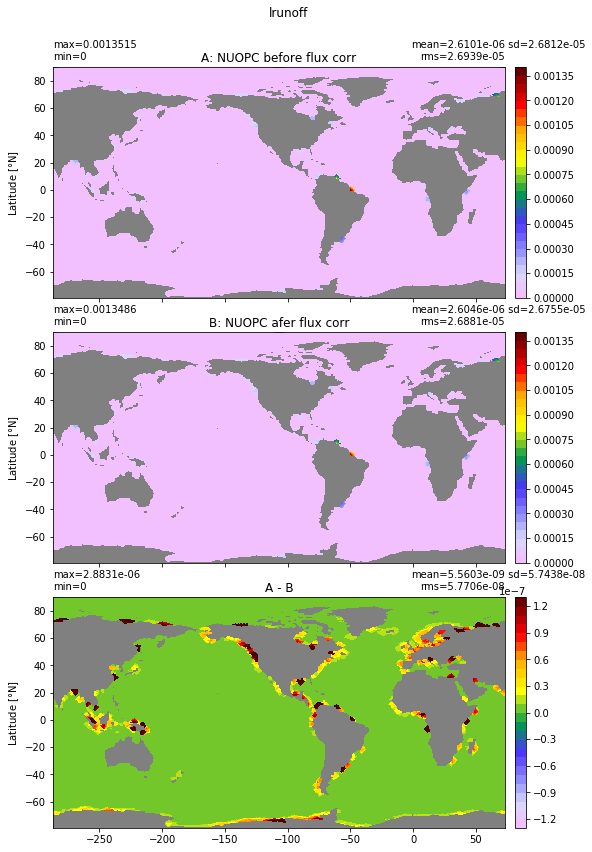

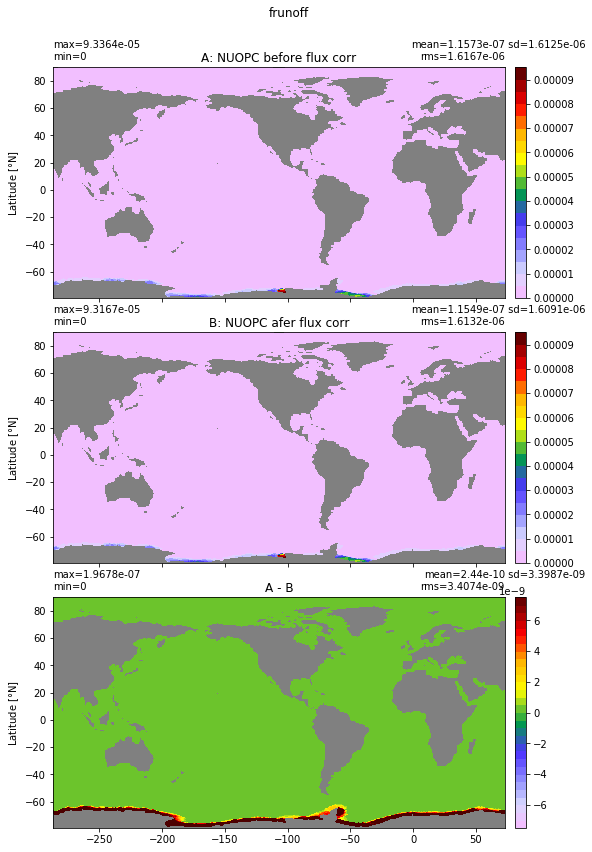

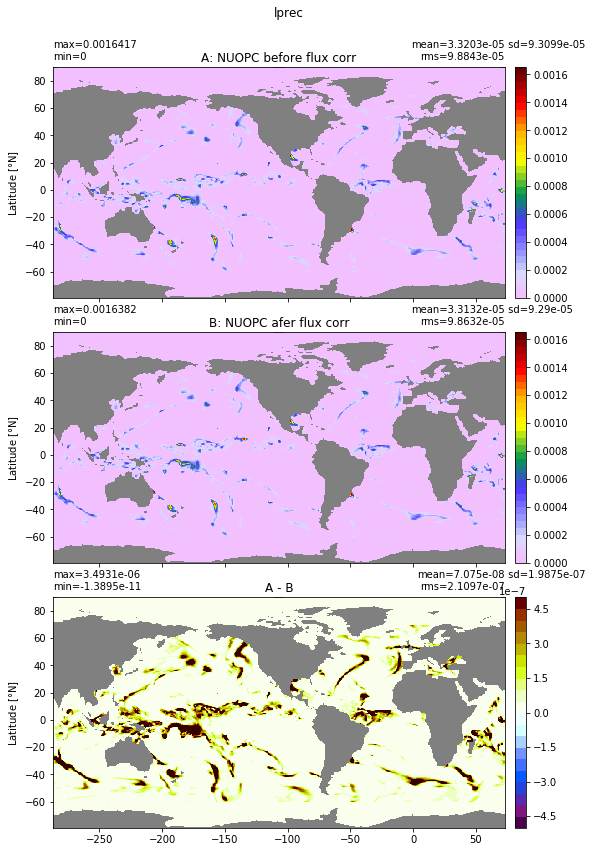

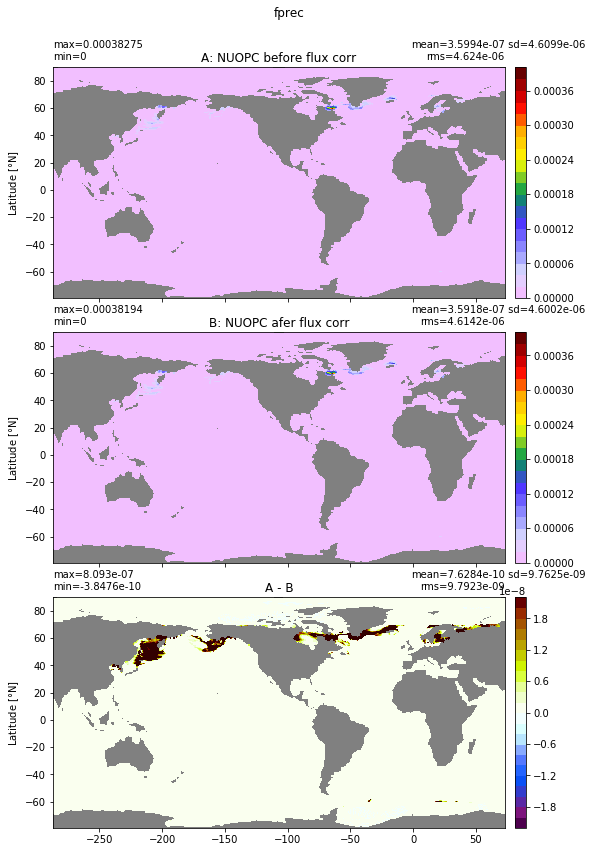

In [9]:
%matplotlib inline

t = 2 # time indice
print('NUOPC1 time (days) = ',g1_npc['time'][t].data)
print('NUOPC2 time (days) = ',g1_npc_flx_corr['time'][t].data)

for p in range(len(variables)):
    print(variables[p])
    nuopc_var2 = np.ma.masked_invalid(g1_npc_flx_corr[variables[p]][t,:].values)
    nuopc_var1 = np.ma.masked_invalid(g1_npc[variables[p]][t,:].values)
    xycompare(nuopc_var1, nuopc_var2, x=grd.geolon, y=grd.geolat, area=grd.area_t, title1='NUOPC before flux corr', title2='NUOPC afer flux corr', suptitle=variables[p])
    